# Диаграмма размаха

Узнаем, как находить выбросы в одномерных данных.
Представим, что значения признака — это мешок чисел. Нужно найти числа, сильно отличающиеся от остальных. Для этого сравним их с медианой на диаграмме размаха (англ. boxplot), или «ящике с усами». 

Повторим обозначения. Верхняя и нижняя границы ящика — третья и первая квартиль (75% и 25% значений). Посередине обозначена медиана (50% значений). «Усы» простираются вверх и вниз от границ ящика на расстояние, равное 1.5 межквартильным размахам (IQR, от англ. interquartile range). Выбросы указаны за пределами усов — максимумом и минимумом.

Межквартильный размах IQR вычисляется так:
![image.png](attachment:image.png)

Чем больше коэффициент k, тем меньше объектов будут считаться выбросами. Обычно его указывают равным 1.5.
В этой теме будем работать с данными интернет-магазина офисных товаров. В датасете содержится информация о 9994 продажах. Построим ящик с усами для признака 'Sales' (англ. «продажи»):

```import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/datasets/sales.csv')

plt.boxplot(df['Sales'].values)
plt.ylabel('Сумма продаж')
plt.title("Выбросы в сумме продаж")
plt.show() 
```
Средний чек бо́льшей части покупок — 500–1000 $. Продажи от 5 до 20 тысяч долларов — аномалии (они отмечены кругами).
Диаграмма даёт информацию обо всех выбросах. Она хранится в записи "fliers" (на англ. синоним «аномалии») внутри объекта boxplot. Вызовом функции 
```get_data()``` из объектов получим числа. Нужные значения отделены индексами.
```
boxplot = plt.boxplot(df['Sales'].values)
outliers = list(boxplot["fliers"][0].get_data()[1])
print("Выбросов в продажах: ", len(outliers))
```
Получили:
Выбросов в продажах:  1167 

### 1) Найдите в датасете аномалии по признаку 'Profit'. Из ящика с усами возьмите список аномалий и запишите результат в переменной outliers. Отфильтруйте исходный датафрейм функцией isin() и сохраните список объектов с аномалиями в переменной df_outliers.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/Users/yuliabezginova/PycharmProjects/unsupervised_learning/sales.csv')

Диаграмма даёт информацию обо всех выбросах. Она хранится в записи "fliers" (на англ. синоним «аномалии») внутри объекта boxplot. Вызовом функции get_data() из объектов получим числа. Нужные значения отделены индексами.

Количество аномалий:  1881
Длина датасета:  9994
Процент аномалий:  18.82 %


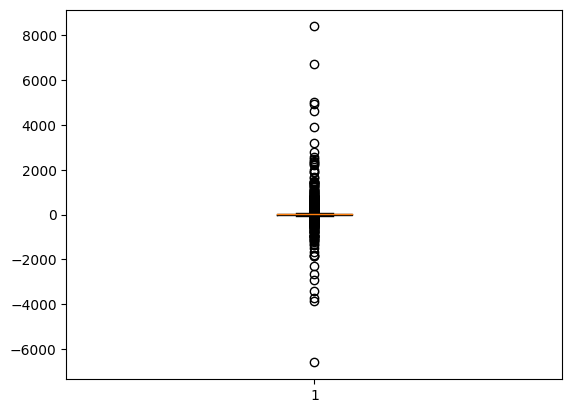

In [9]:
boxplot = plt.boxplot(df['Profit'].values)
outliers = list(boxplot["fliers"][0].get_data()[1])

df_outliers = df[df["Profit"].isin(outliers)]

print("Количество аномалий: ", len(df_outliers))
print("Длина датасета: ", len(df))
print("Процент аномалий: ", round(len(df_outliers) / len(df) * 100, 2), '%')

### Почти 20% заказов - это выбросы. Перепроверим этот факт другим алгоритмом - изоляционным лесом (isolation forest).